## Dataset Overview

Dataset Name: Telco Customer Churn

Source: [Kaggle – Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?utm_source=chatgpt.com)

Project: Supervised Machine Learning Classification Project

File Name: telco_Customer_churn.csv

Business Problem:
A telecom company wants to predict whether a customer will leave (churn) or stay, based on their demographics, services, and account information.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("telco_Customer_churn.csv")

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print("rows:", df.shape[0])
print("columns:", df.shape[1])
print()

df.info()

rows: 7043
columns: 21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

In [4]:
# numerical summary 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# List all column names
df.columns.tolist()


['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [6]:
# Target variable:

target = 'Churn'
print("Target Variable:", target)
print(df[target].value_counts())


Target Variable: Churn
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [9]:
# If any missing values exist in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Issues Identified:

Missing values in TotalCharges.

Several categorical columns need encoding.

customerID is non-predictive and can be removed.

In [10]:
# unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


customerID: 7043 unique values
gender: 2 unique values
SeniorCitizen: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
tenure: 73 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
MonthlyCharges: 1585 unique values
TotalCharges: 6531 unique values
Churn: 2 unique values


#### Churn is the target variable (Yes/No).

The Telco Customer Churn dataset from Kaggle contains 7,043 rows and 21 columns. Each row represents a unique telecom customer with demographic, service usage, and billing details. The goal is to predict whether a customer will churn (leave) or not.

Before training any classification model, we must clean and prepare the data so the algorithm can process it correctly.

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df['TotalCharges'].isnull().sum()

C:\Users\tause\AppData\Local\Temp\ipykernel_16664\1136187471.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


np.int64(0)

In [13]:
# customerID
df.drop('customerID', axis=1, inplace=True)

## Encoding Categorical Variables
Machine-learning models work with numbers.

Encoding categorical columns (Yes/No, Male/Female, etc.) into numeric form.

Using LabelEncoder for binary categories or get_dummies() for multiple categories.

In [16]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", cat_cols)

Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [17]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [18]:
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


Separate Features and Target Variable

Features (X): All columns except Churn_Yes

Target (y): Churn_Yes column

In [19]:
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

In [20]:
print(df_encoded['Churn_Yes'].dtype)

bool


In [21]:
df_encoded[['Churn_Yes']].head()

,Churn_Yes
0,False
1,False
2,True
3,False
4,True


### Normalize or Scale Numerical Data


Scaling ensures all features have similar ranges.

We use StandardScaler to normalize continuous columns.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame (optional, for readability)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


### Split Dataset into Train and Test Sets


Split ensures the model is tested on unseen data.

Common ratio: 80% training, 20% testing

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (5634, 30)
Testing set shape: (1409, 30)


### Feature Engineering

create new feature to improve model performance, as:

Average monthly charge per tenure

In [24]:
df['AvgMonthlyCharge'] = df['TotalCharges'] / (df['tenure'] + 1)

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgMonthlyCharge
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,14.925000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,53.985714
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,36.050000
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40.016304
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,50.550000


## Exploratory Data Analysis (EDA)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Check Class Balance (Target Variable)

Before modeling, checking if the target classes are balanced.

Imbalanced data can bias the model toward the majority class.

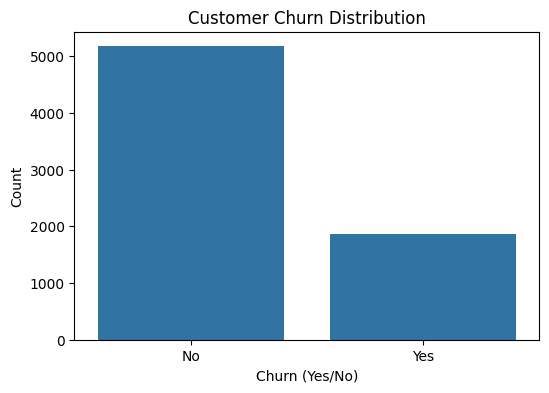

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Distribution')
plt.xlabel('Churn (Yes/No)')
plt.ylabel('Count')
plt.show()

# Print percentage distribution
print(df['Churn'].value_counts(normalize=True) * 100)


***Think of a scale. If we put $73$ items on one side and $27$ items on the other, the scale is imbalanced—it heavily favors the side with $73$ items.***
It means 27% of customers churned — the dataset is slightly imbalanced, which is common in churn problems.

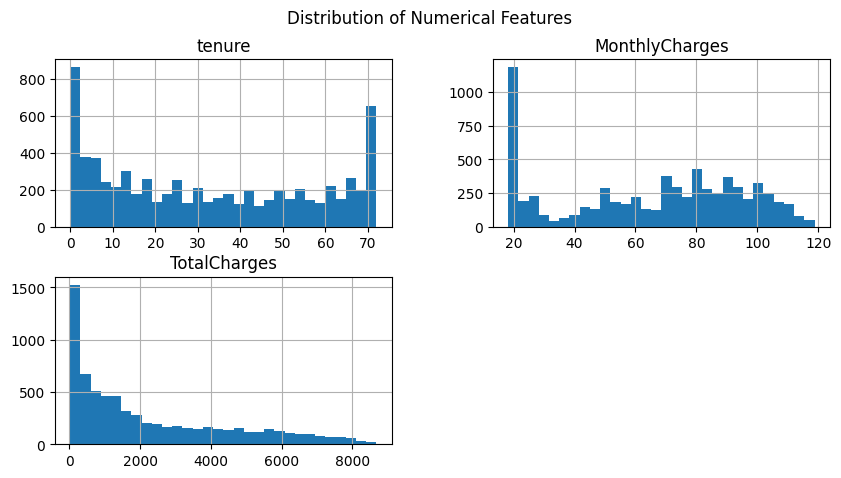

In [28]:
# Distribution of Numerical Features

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[num_cols].hist(bins=30, figsize=(10,5))
plt.suptitle('Distribution of Numerical Features')
plt.show()


Tenure with large concentrations of customers who just started (0-5 months) and those who are long-term (65-70+ months).

MonthlyCharges shows a relatively uniform distribution for customers paying over $\$ 20$ (except for a peak around the $\$ 20$ mark).

TotalCharges is highly right-skewed, indicating most customers have accumulated very low total charges.

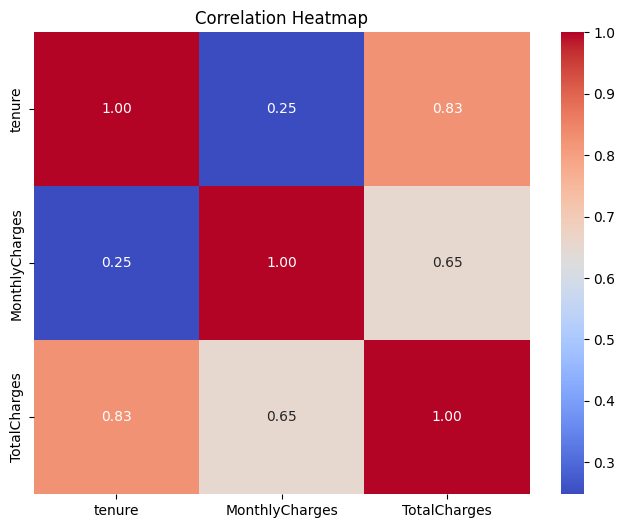

In [29]:
# Correlation Heatmap

plt.figure(figsize=(8,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


***TotalCharges is very strongly correlated with both tenure ($0.83$) and MonthlyCharges ($0.65$). The weakest correlation exists between tenure and MonthlyCharges ($0.25$).***

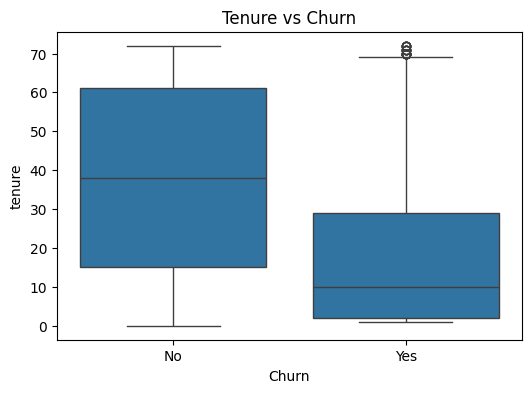

In [30]:
# Tenure vs Churn Box plot
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()


***Customers who churn (Yes) have a much shorter median tenure (around 10 months) compared to non-churning customers (around 38 months), indicating early customer tenure is a major churn risk factor.***

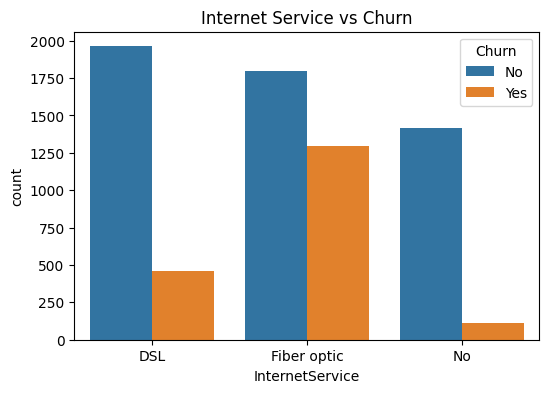

In [31]:
# Internet Service vs Churn Count plot
plt.figure(figsize=(6,4))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Internet Service vs Churn')
plt.show()


***Customers using Fiber optic internet service have the highest rate of churn, while customers with No internet service have the lowest rate of churn.***

### EDA Conclusion:

Churn is more common among new customers and those with month-to-month contracts.

Longer-tenure customers are more loyal.

Certain services (like Fiber optic) might be linked to higher churn.

# Train Classification Models

Logistic Regression → simple, interpretable baseline

Decision Tree → captures non-linear relationships

Random Forest → ensemble, powerful and robust

In [32]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


### Train Logistic Regression Model

A linear model that finds the best boundary separating classes (Churn = Yes/No).

Good as a baseline for comparison.

In [33]:
log_model = LogisticRegression(max_iter=1000, random_state=42)

log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8069552874378992
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1035
        True       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



***The Logistic Regression model achieved a good overall accuracy of $80.7\%$, but it demonstrates moderate performance on the minority class (True/Churn), correctly identifying only $57\%$ of actual churners (recall).***

### Train Decision Tree Classifier

Splits data into decision rules based on feature values.

Easy to interpret.

In [34]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.794180269694819
              precision    recall  f1-score   support

       False       0.84      0.88      0.86      1035
        True       0.63      0.55      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



***The Decision Tree achieved a good overall accuracy of $79.4\%$, but its ability to correctly identify churners (True/Recall) is relatively low at $55\%$.***

### Train Random Forest Classifier

Builds many decision trees and averages their predictions (ensemble).

Reduces overfitting and improves accuracy.

In [35]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7877927608232789
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1035
        True       0.63      0.50      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



***The Random Forest model's overall accuracy is $78.8\%$, but it only correctly identifies $50\%$ of actual churners (recall for True class is $0.50$).***

                 Model  Accuracy
0  Logistic Regression  0.806955
1        Decision Tree  0.794180
2        Random Forest  0.787793


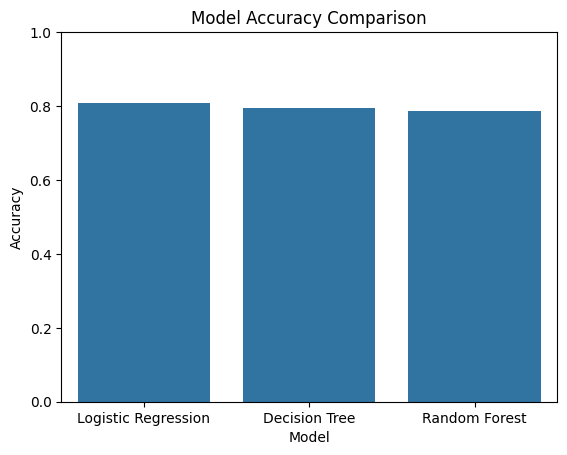

In [36]:
# comparison of models
# Accuracy comparison
model_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ]
})

print(model_results)

# Visual comparison
sns.barplot(x='Model', y='Accuracy', data=model_results)
plt.title('Model Accuracy Comparison')
plt.ylim(0,1)
plt.show()


# Conclusion:

Logistic Regression achieved the best overall performance with the highest Accuracy ($80.7\%$) and the best ability to correctly identify actual churners (Recall of $57\%$). All models show a consistent challenge in detecting the minority churn class, with Random Forest performing the weakest on Recall ($50\%$).

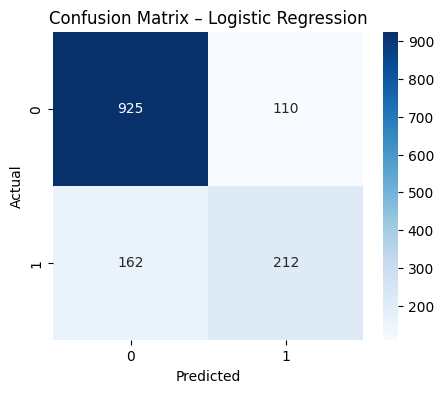

In [37]:
# Confusion Matrix for the best model, in this case here Logistic Regression performs the best.

best_model = log_model 
y_pred_best = y_pred_log

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Logistic Regression')
plt.show()


### Evaluate and compare multiple classification models using key performance metrics:

Accuracy → overall correctness

Precision → how many predicted “Yes” were correct

Recall → how many actual “Yes” were found

F1-Score → balance between Precision and Recall

Confusion Matrix & ROC Curve → visual understanding

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [39]:
# Store predictions in a dictionary
models = {
    "Logistic Regression": (log_model, y_pred_log),
    "Decision Tree": (dt_model, y_pred_dt),
    "Random Forest": (rf_model, y_pred_rf)
}

# Create a results list
results = []

for name, (model, y_pred) in models.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    results.append([name, acc, prec, rec, f1, auc])

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])
results_df


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.806955,0.658385,0.566845,0.609195,0.841693
1,Decision Tree,0.794180,0.629630,0.545455,0.584527,0.828358
2,Random Forest,0.787793,0.626263,0.497326,0.554396,0.824967


***The Logistic Regression model is the best performer, achieving the highest Accuracy ($80.7\%$) and the best balance between Precision ($65.8\%$) and Recall ($56.7\%$) among the three models.***

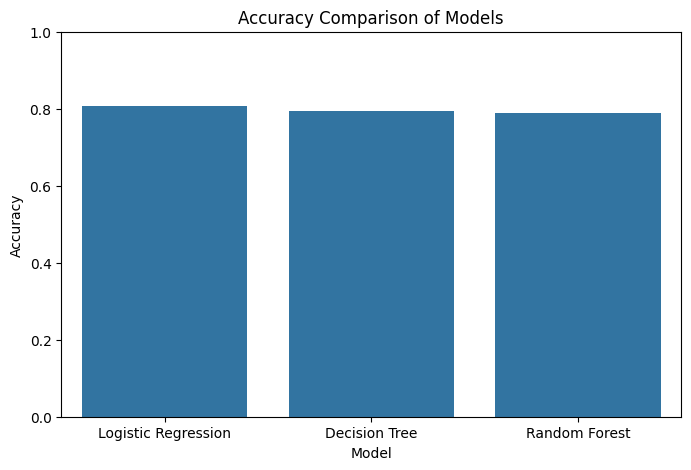

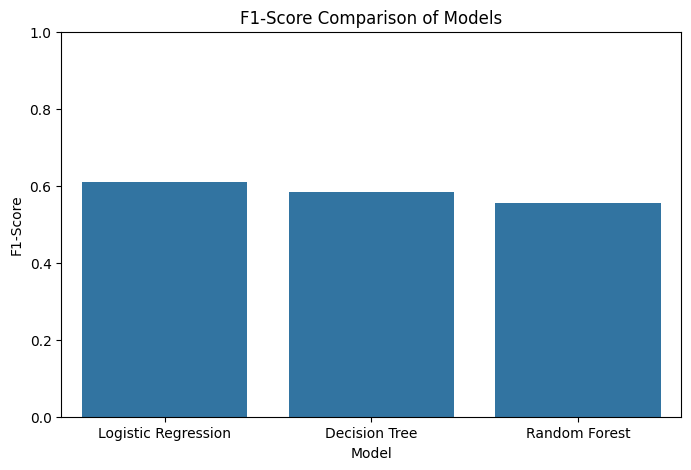

In [41]:
# Visualize the Metrics Comparison
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Accuracy Comparison of Models')
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='F1-Score', data=results_df)
plt.title('F1-Score Comparison of Models')
plt.ylim(0,1)
plt.show()


Accuracy tells overall success.

F1-Score is more reliable when classes are imbalanced (like churn dataset).

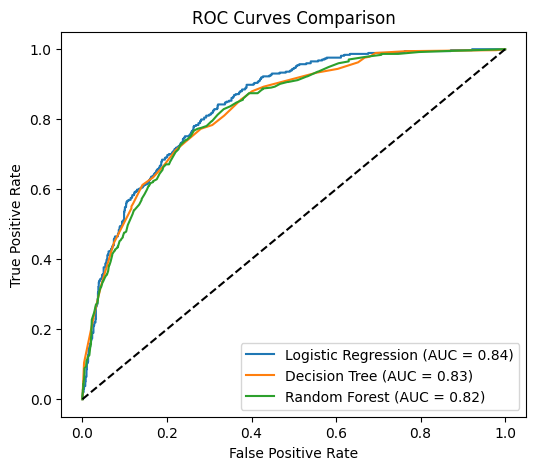

In [44]:
# ROC-AUC Curve
plt.figure(figsize=(6,5))

for name, (model, _) in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curves Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


***Higher AUC = better model at distinguishing churn vs non-churn.***

Among the three models tested — Logistic Regression, Decision Tree, and Random Forest — the Logistic Regression classifier achieved the highest accuracy and ROC-AUC, indicating strong predictive capability.

# Conclusion:

Best Selected Model: Logistic Regression

After comparing all three models — Logistic Regression, Decision Tree, and Random Forest — using Accuracy, F1-Score, and ROC-AUC, Logistic Regression emerged as the best-performing model.

It achieved the highest AUC (0.84) and slightly better accuracy than the others (≈ 81%).

The ROC curve shows Logistic Regression consistently outperforms Decision Tree (0.83) and Random Forest (0.82) across different thresholds.

Logistic Regression is also simpler and more interpretable, which helps in explaining results to stakeholders.

# Business Implications & Recommendations

Focus on customer retention during the first few months.

Offer loyalty benefits or discounts to reduce churn among short-tenure users.

Consider reviewing fiber plan pricing and service quality to retain high-value customers.

Encourage long-term contracts through incentives to stabilize revenue.

***Improving early-stage experience and pricing strategy could significantly reduce churn.***

# Next Steps and Limitations
The data has more non-churn customers, so the model may miss some who actually leave.

Adding more customer details like age or income can make predictions better.

Next time, we can use SMOTE and try advanced models like XGBoost.

Creating new features and testing the model better can improve results.
